# Import Library



In [1]:
import kagglehub



In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Data Loading

In [3]:
# Download latest version
path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-habits-vs-academic-performance


In [4]:
df = pd.read_csv(path+'/student_habits_performance.csv')
#df = pd.read_csv(path+'/StudentPerformanceFactors.csv')

In [5]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [7]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [8]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [9]:
print(f'Jumlah data duplikat: {df.duplicated().sum()}')

Jumlah data duplikat: 0


In [10]:
df['parental_education_level']= df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [11]:
df['screen_time'] = df['social_media_hours'] + df['netflix_hours']
df.drop(['social_media_hours', 'netflix_hours'], axis=1, inplace=True)

In [12]:
df.describe()

,age,study_hours_per_day,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,screen_time
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,84.131700,6.470100,3.042000,5.438000,69.601500,4.325200
std,2.3081,1.46889,9.399246,1.226377,2.025423,2.847501,16.888564,1.599808
min,17.0000,0.00000,56.000000,3.200000,0.000000,1.000000,18.400000,0.200000
25%,18.7500,2.60000,78.000000,5.600000,1.000000,3.000000,58.475000,3.300000
50%,20.0000,3.50000,84.400000,6.500000,3.000000,5.000000,70.500000,4.400000
75%,23.0000,4.50000,91.025000,7.300000,5.000000,8.000000,81.325000,5.400000
max,24.0000,8.30000,100.000000,10.000000,6.000000,10.000000,100.000000,10.100000


In [13]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0
parental_education_level,0


In [14]:

numerical_columns = df.select_dtypes(include=np.number).columns


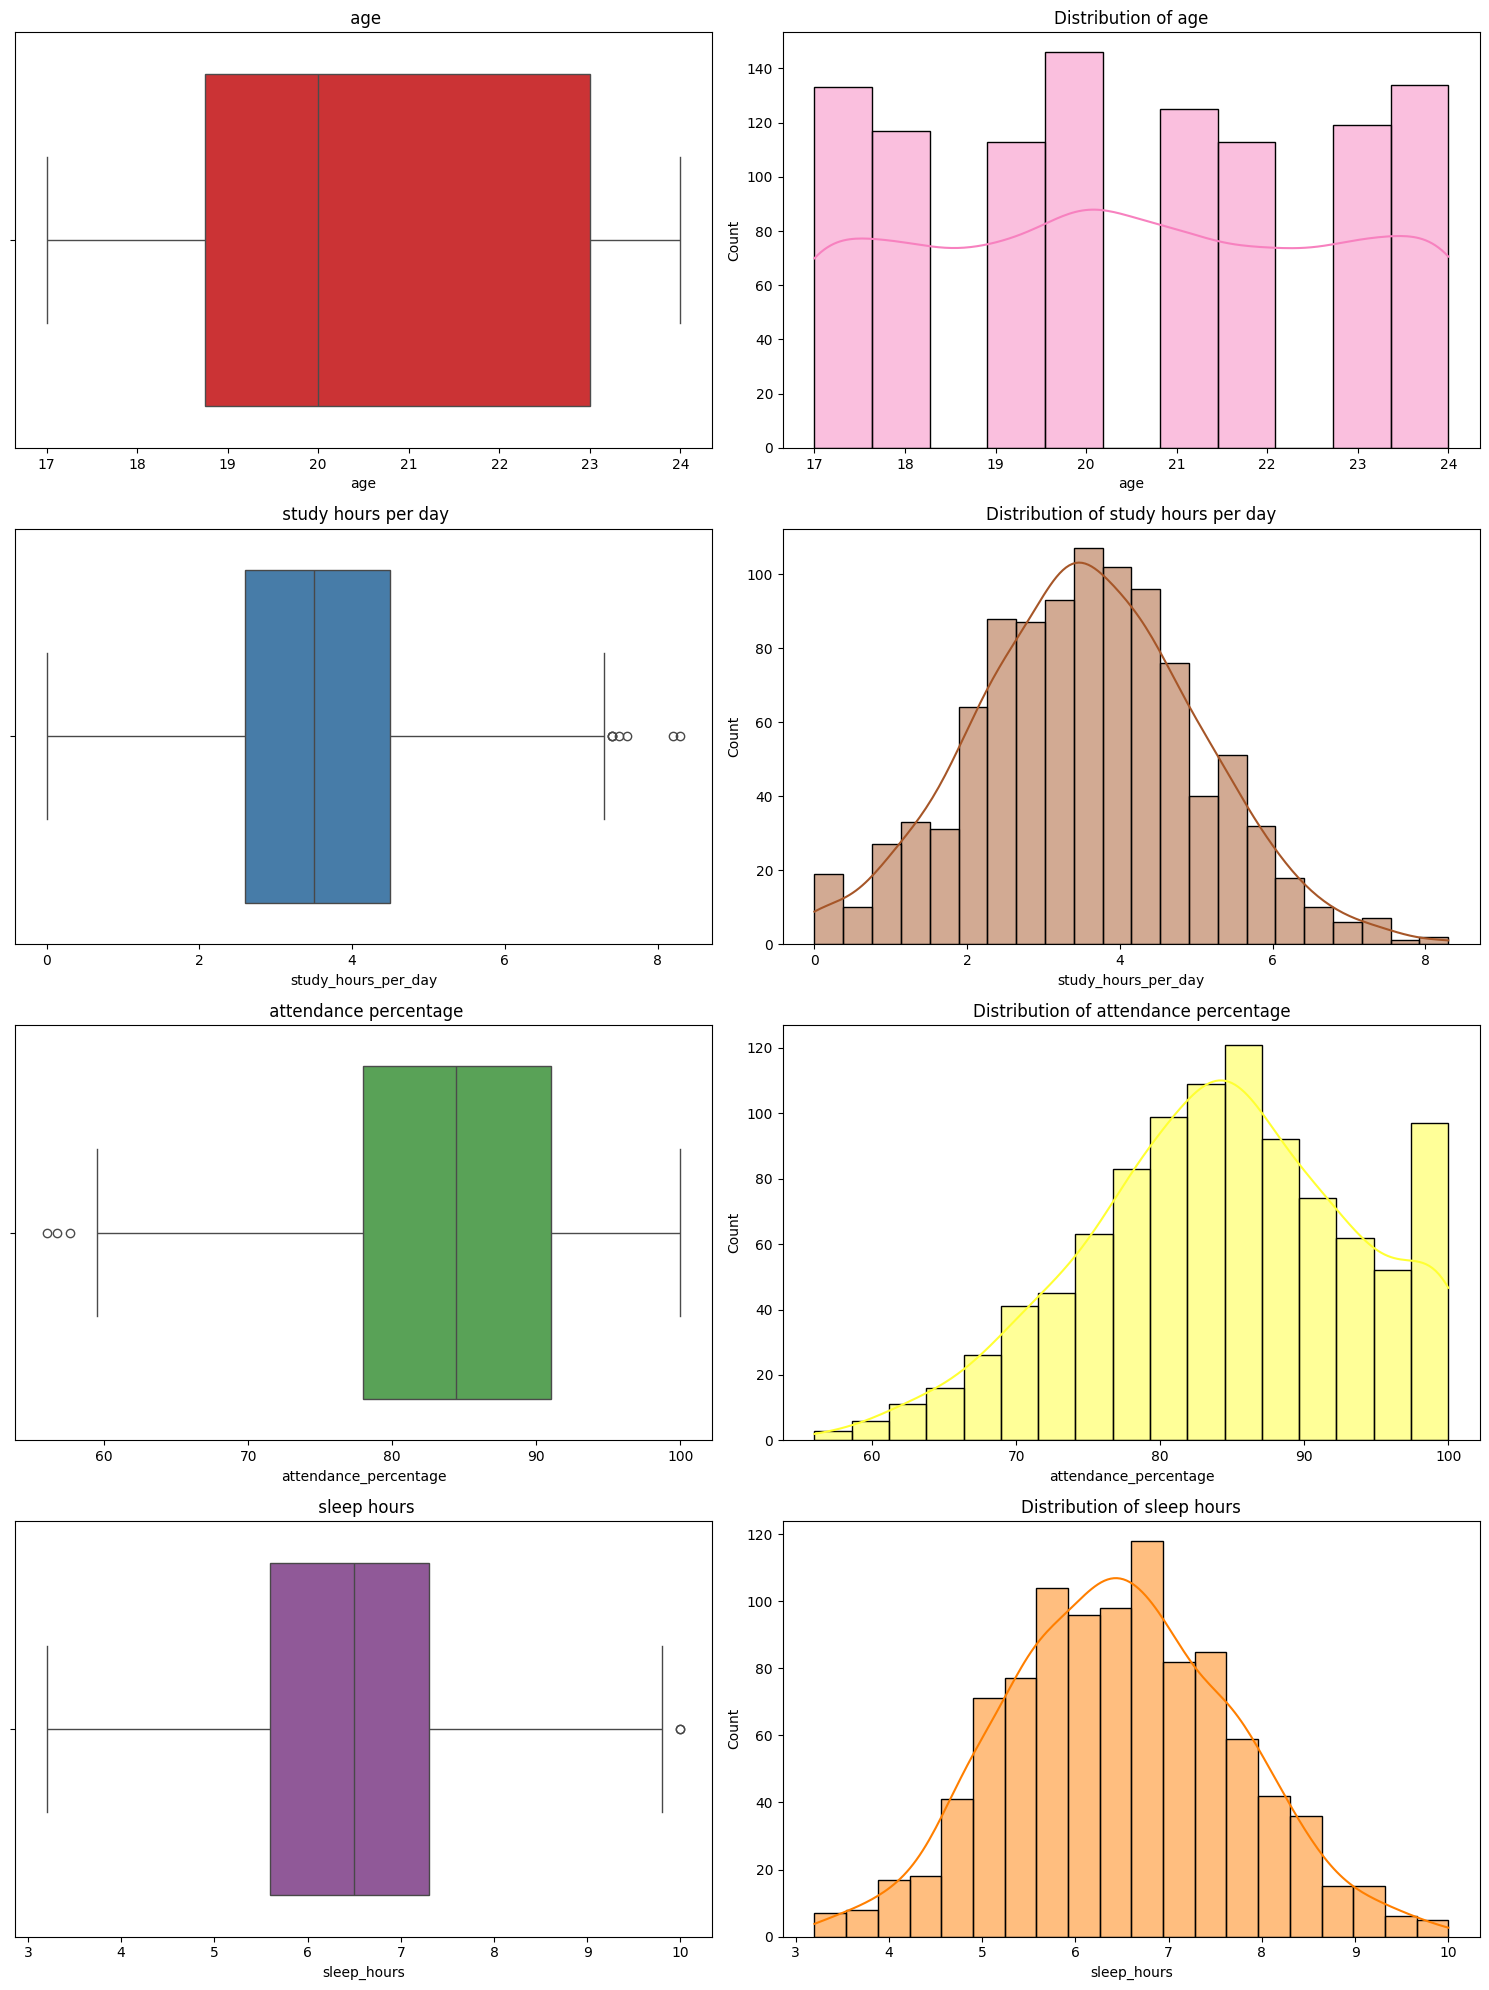

In [15]:
colors = sns.color_palette("Set1", n_colors=len(numerical_columns))

fig1, axes1 = plt.subplots(4, 2, figsize=(15, 20))

for i in range(4):
    var = numerical_columns[i]

    sns.boxplot(x=var, data=df, ax=axes1[i, 0], color=colors[i])
    axes1[i, 0].set_title(f' {var.replace("_", " ")}')

    hist_color_idx = len(colors) - 1 - i
    sns.histplot(df[var], ax=axes1[i, 1], color=colors[hist_color_idx], kde=True, edgecolor='black')
    axes1[i, 1].set_title(f'Distribution of {var.replace("_", " ")}')

plt.tight_layout()
plt.show()



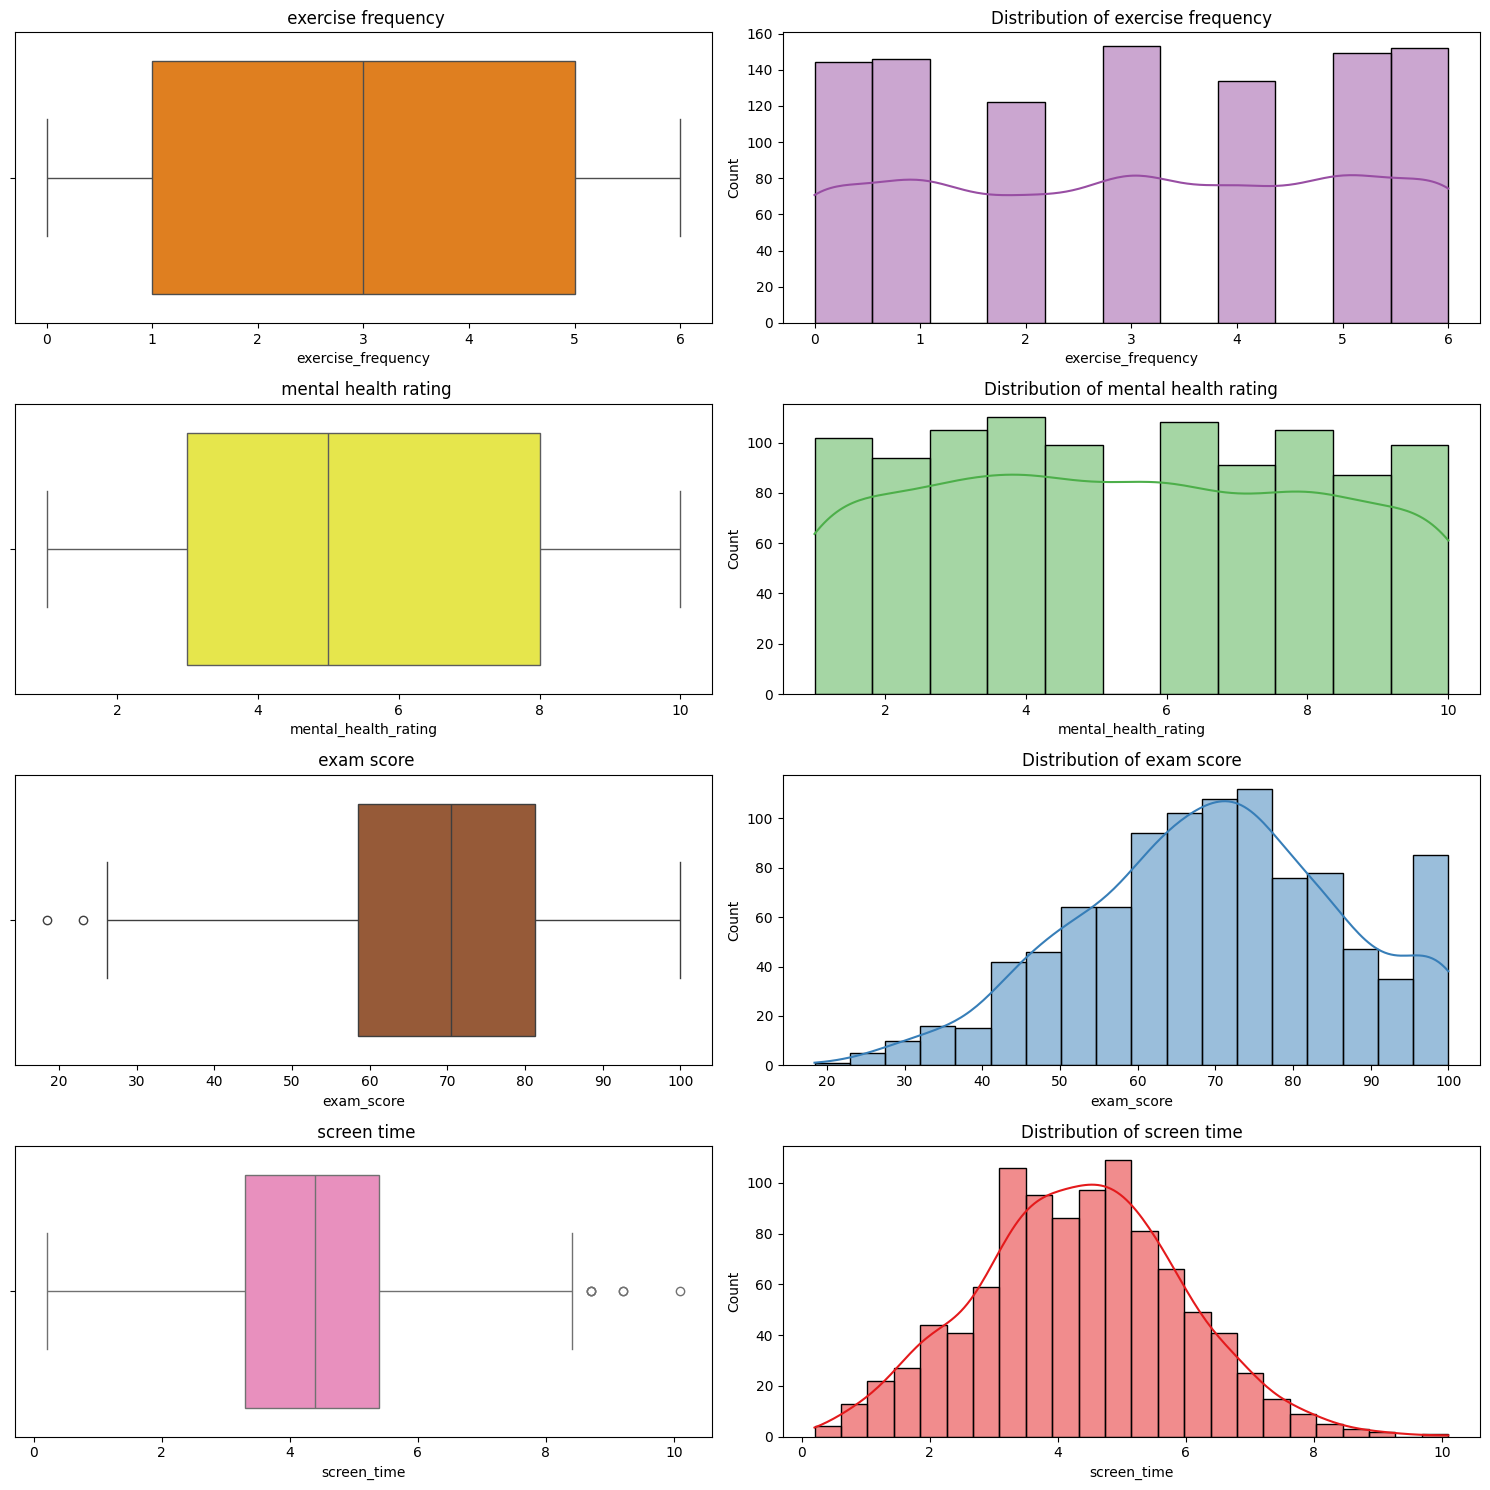

In [16]:
fig2, axes2 = plt.subplots(4, 2, figsize=(15, 15))

for i in range(4, 8):
    var = numerical_columns[i]
    j = i - 4
    sns.boxplot(x=var, data=df, ax=axes2[j, 0], color=colors[i])
    axes2[j, 0].set_title(f' {var.replace("_", " ")}')

    hist_color_idx = len(colors) - 1 - i
    sns.histplot(df[var], ax=axes2[j, 1], color=colors[hist_color_idx], kde=True, edgecolor='black')
    axes2[j, 1].set_title(f'Distribution of {var.replace("_", " ")}')

plt.tight_layout()
plt.show()

In [17]:
df.drop('student_id', axis=1, inplace=True)

In [18]:
categorical_columns = df.select_dtypes(exclude=np.number).columns

In [19]:
df[categorical_columns].nunique()

,0
gender,3
part_time_job,2
diet_quality,3
parental_education_level,3
internet_quality,3
extracurricular_participation,2


In [20]:

for col in categorical_columns:
    print(f'Unique values for {col}: {df[col].unique()}')


Unique values for gender: ['Female' 'Male' 'Other']
Unique values for part_time_job: ['No' 'Yes']
Unique values for diet_quality: ['Fair' 'Good' 'Poor']
Unique values for parental_education_level: ['Master' 'High School' 'Bachelor']
Unique values for internet_quality: ['Average' 'Poor' 'Good']
Unique values for extracurricular_participation: ['Yes' 'No']


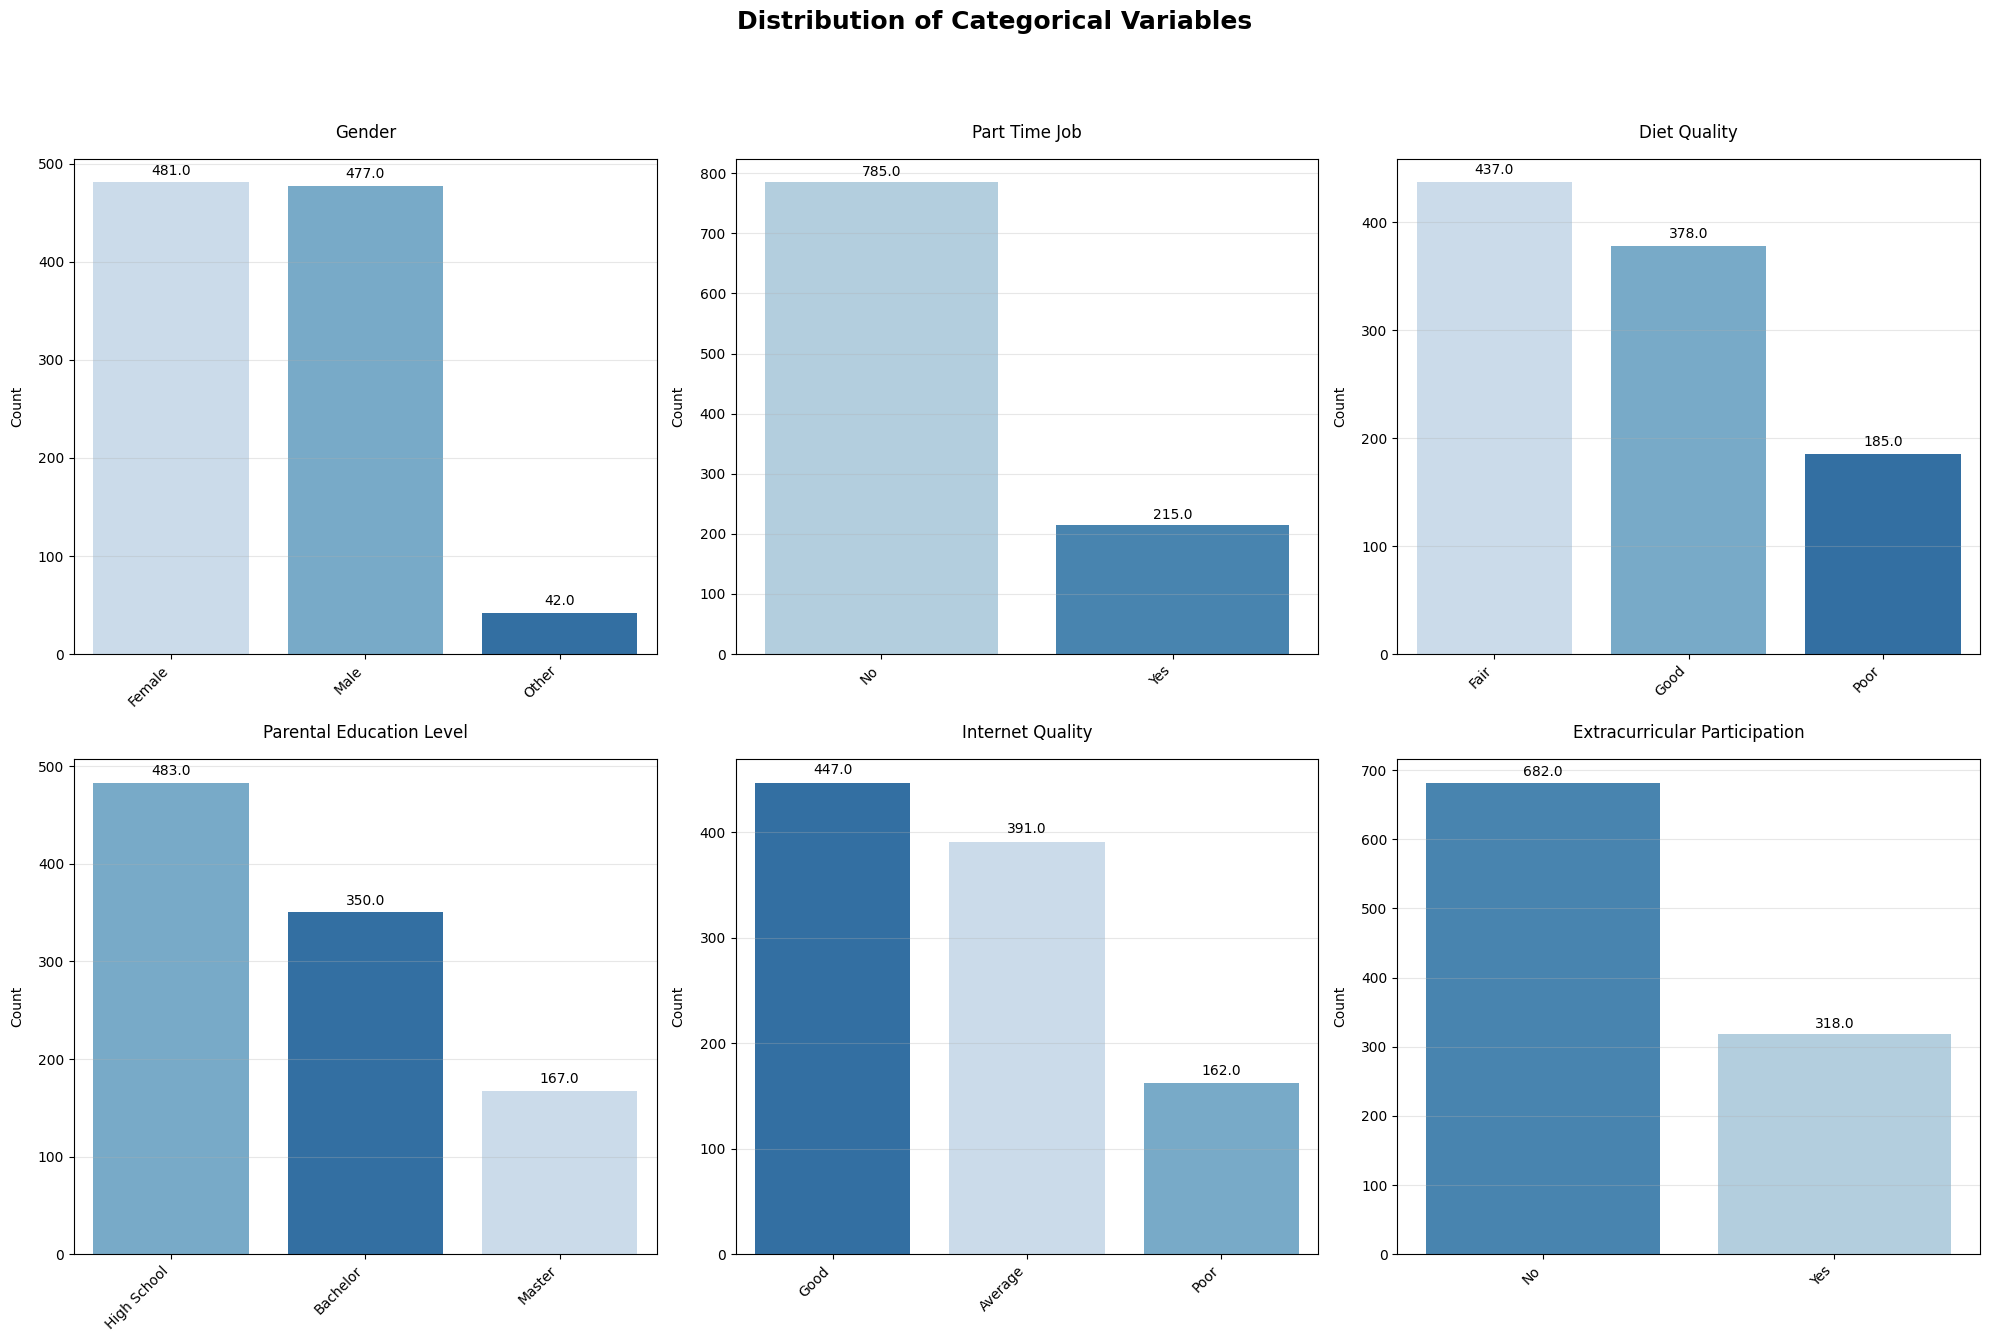

In [21]:

# Setup figure
plt.figure(figsize=(20, 30))
plt.suptitle('Distribution of Categorical Variables', y=1.02, fontsize=18, fontweight='bold')

# Create subplots grid
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)


    ax = sns.countplot(
    x=df[column],
    hue=df[column],
    palette='Blues',
    order=df[column].value_counts().index,
    legend=False
    )


    total = len(df[column])
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 5
        ax.annotate(
            f'{p.get_height()}',
            (x, y),
            ha='center',
            va='bottom',
            fontsize=10
        )

    # Formatting
    plt.title(f'{column.replace("_", " ").title()}', pad=15)
    plt.xlabel('')
    plt.ylabel('Count', labelpad=10)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

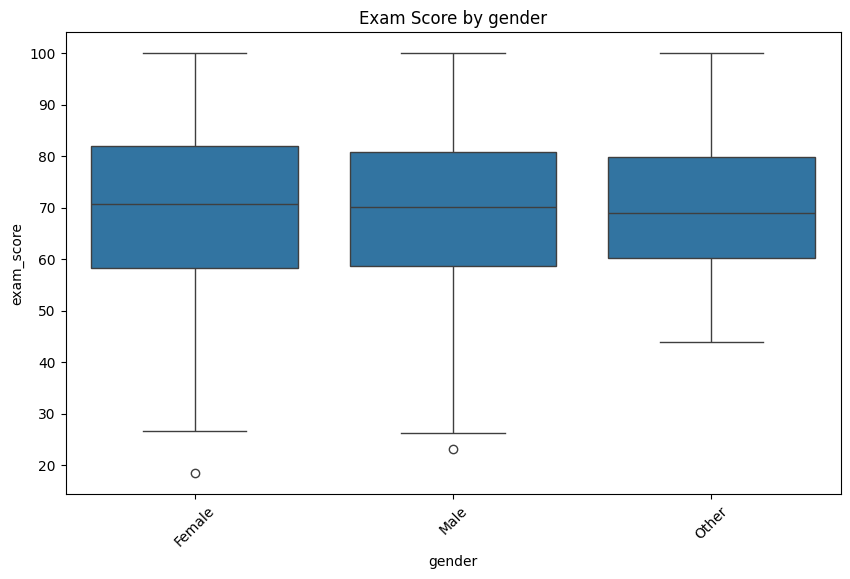

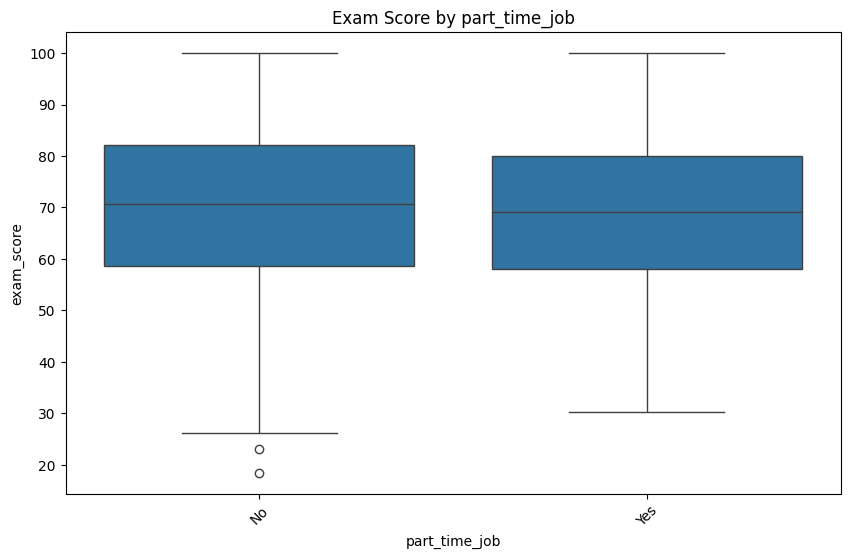

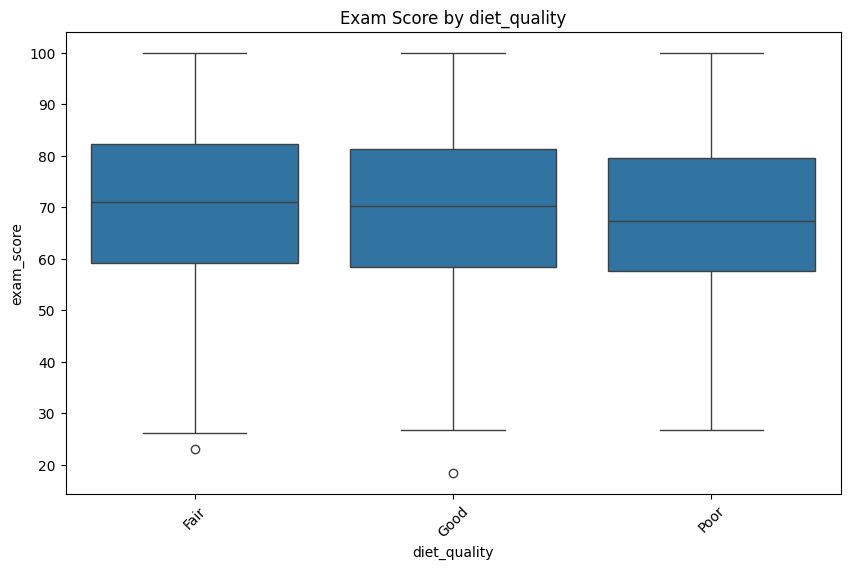

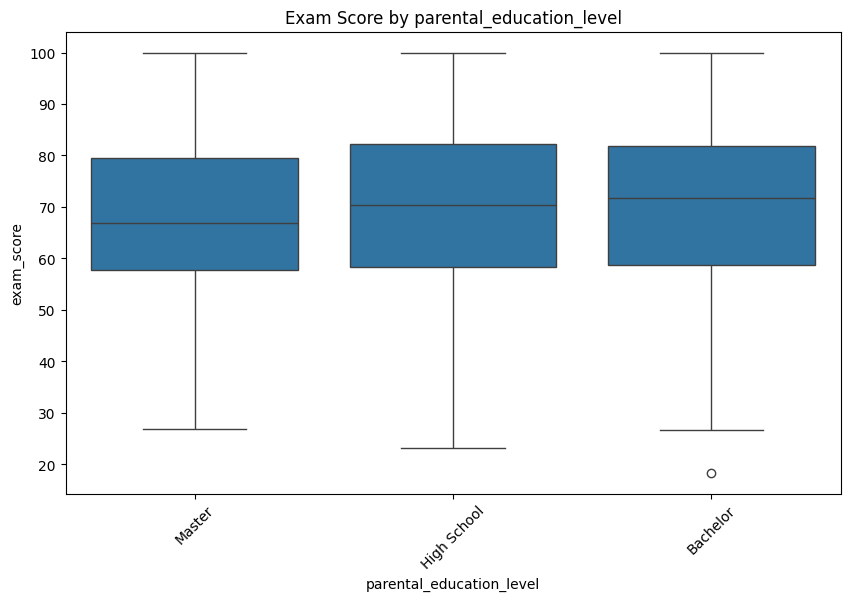

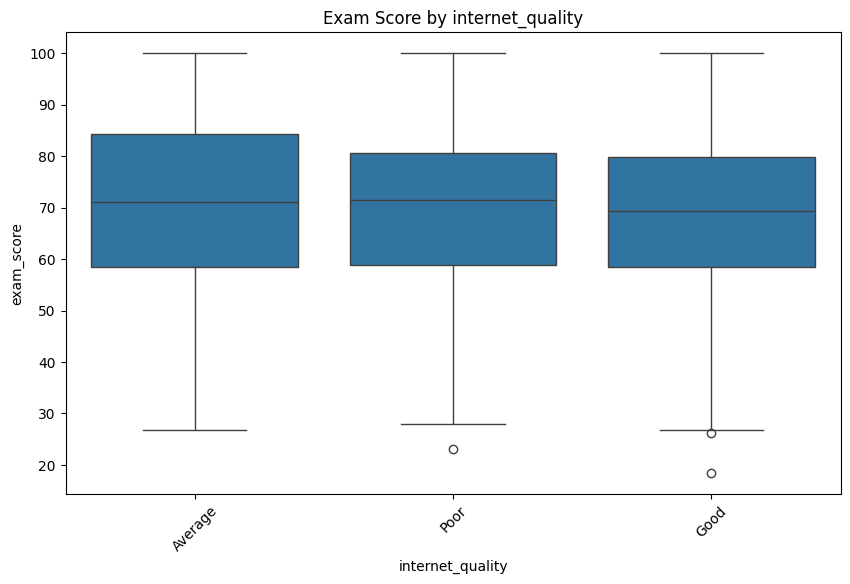

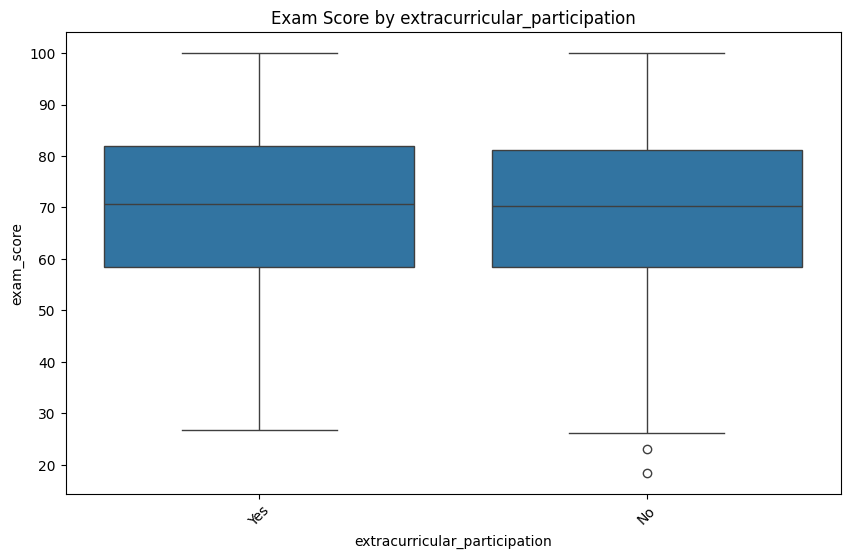

In [22]:

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='exam_score', data=df)
    plt.title(f'Exam Score by {col}')
    plt.xticks(rotation=45)
    plt.show()


# Data Preperation

In [23]:

def map_exam_score(score):
  if score >= 70: # Siswa demgam nilai diatas rata rata dinyatakan lulus
    return "Pass"
  else:
    return "Faill"

df['Exam_Result'] = df['exam_score'].apply(map_exam_score)

df.head()


,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,screen_time,Exam_Result
0,23,Female,0.0,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,2.3,Faill
1,20,Female,6.9,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,5.1,Pass
2,21,Male,1.4,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,4.4,Faill
3,23,Female,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,4.9,Faill
4,19,Female,5.0,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,4.9,Faill


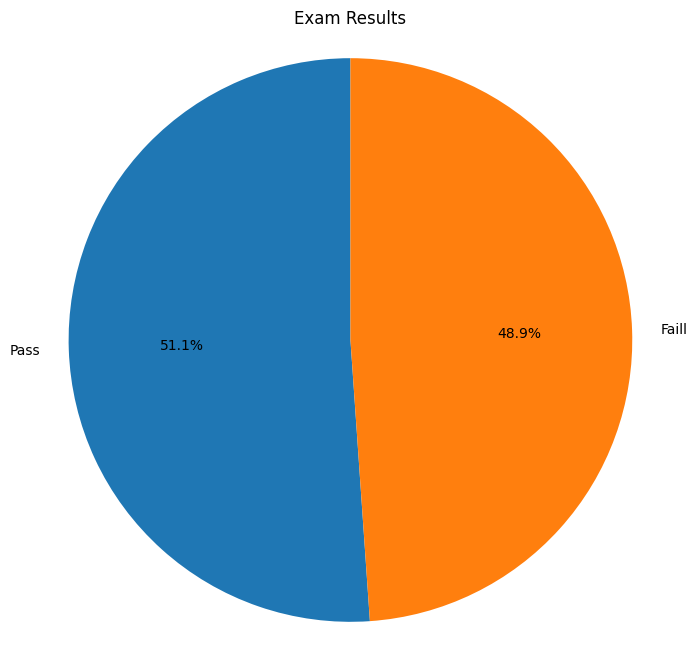

In [24]:
exam_result_counts = df['Exam_Result'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(exam_result_counts, labels=exam_result_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Exam Results')
plt.axis('equal')
plt.show()


In [25]:
df = df.drop('exam_score', axis=1)

## Encoding Feature Kategorikal

In [26]:
# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each categorical column and apply label encoding
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df.head()


,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,screen_time,Exam_Result
0,23,0,0.0,0,85.0,8.0,0,6,2,0,8,1,2.3,Faill
1,20,0,6.9,0,97.3,4.6,1,6,1,0,8,0,5.1,Pass
2,21,1,1.4,0,94.8,8.0,2,1,1,2,1,0,4.4,Faill
3,23,0,1.0,0,71.0,9.2,2,4,2,1,1,1,4.9,Faill
4,19,0,5.0,0,90.9,4.9,0,3,2,1,1,0,4.9,Faill


In [27]:
df['Exam_Result']=le.fit_transform(df['Exam_Result'])

In [28]:
df.corr()

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,screen_time,Exam_Result
age,1.000000,0.032902,0.003971,-0.011680,-0.026055,0.037482,-0.011893,-0.003836,-0.024852,0.047202,-0.045101,-0.004993,-0.007496,-0.009953
gender,0.032902,1.000000,-0.016126,0.035515,-0.021779,0.018843,-0.001462,0.052808,0.041697,0.055261,-0.003496,-0.001487,0.027056,-0.016259
study_hours_per_day,0.003971,-0.016126,1.000000,-0.029133,0.026264,-0.027757,-0.071706,-0.028701,0.020246,-0.026501,-0.003768,-0.003264,-0.006075,0.639459
part_time_job,-0.011680,0.035515,-0.029133,1.000000,-0.041771,0.001645,-0.002671,-0.021679,0.022211,-0.071441,0.013539,-0.022841,0.021741,-0.033429
attendance_percentage,-0.026055,-0.021779,0.026264,-0.041771,1.000000,0.013756,-0.005030,-0.007857,-0.061385,0.036418,-0.018745,-0.017778,0.028259,0.091522
sleep_hours,0.037482,0.018843,-0.027757,0.001645,0.013756,1.000000,0.020376,0.019769,-0.017800,-0.008818,-0.006508,0.027693,0.012736,0.116656
diet_quality,-0.011893,-0.001462,-0.071706,-0.002671,-0.005030,0.020376,1.000000,0.037401,0.019020,-0.024035,0.057536,0.066477,0.037114,-0.059501
exercise_frequency,-0.003836,0.052808,-0.028701,-0.021679,-0.007857,0.019769,0.037401,1.000000,-0.027928,0.006715,-0.000242,-0.005681,-0.031683,0.110220
parental_education_level,-0.024852,0.041697,0.020246,0.022211,-0.061385,-0.017800,0.019020,-0.027928,1.000000,0.004254,-0.099466,-0.014841,0.019527,-0.067571
internet_quality,0.047202,0.055261,-0.026501,-0.071441,0.036418,-0.008818,-0.024035,0.006715,0.004254,1.000000,-0.019715,0.017670,0.004394,-0.016911


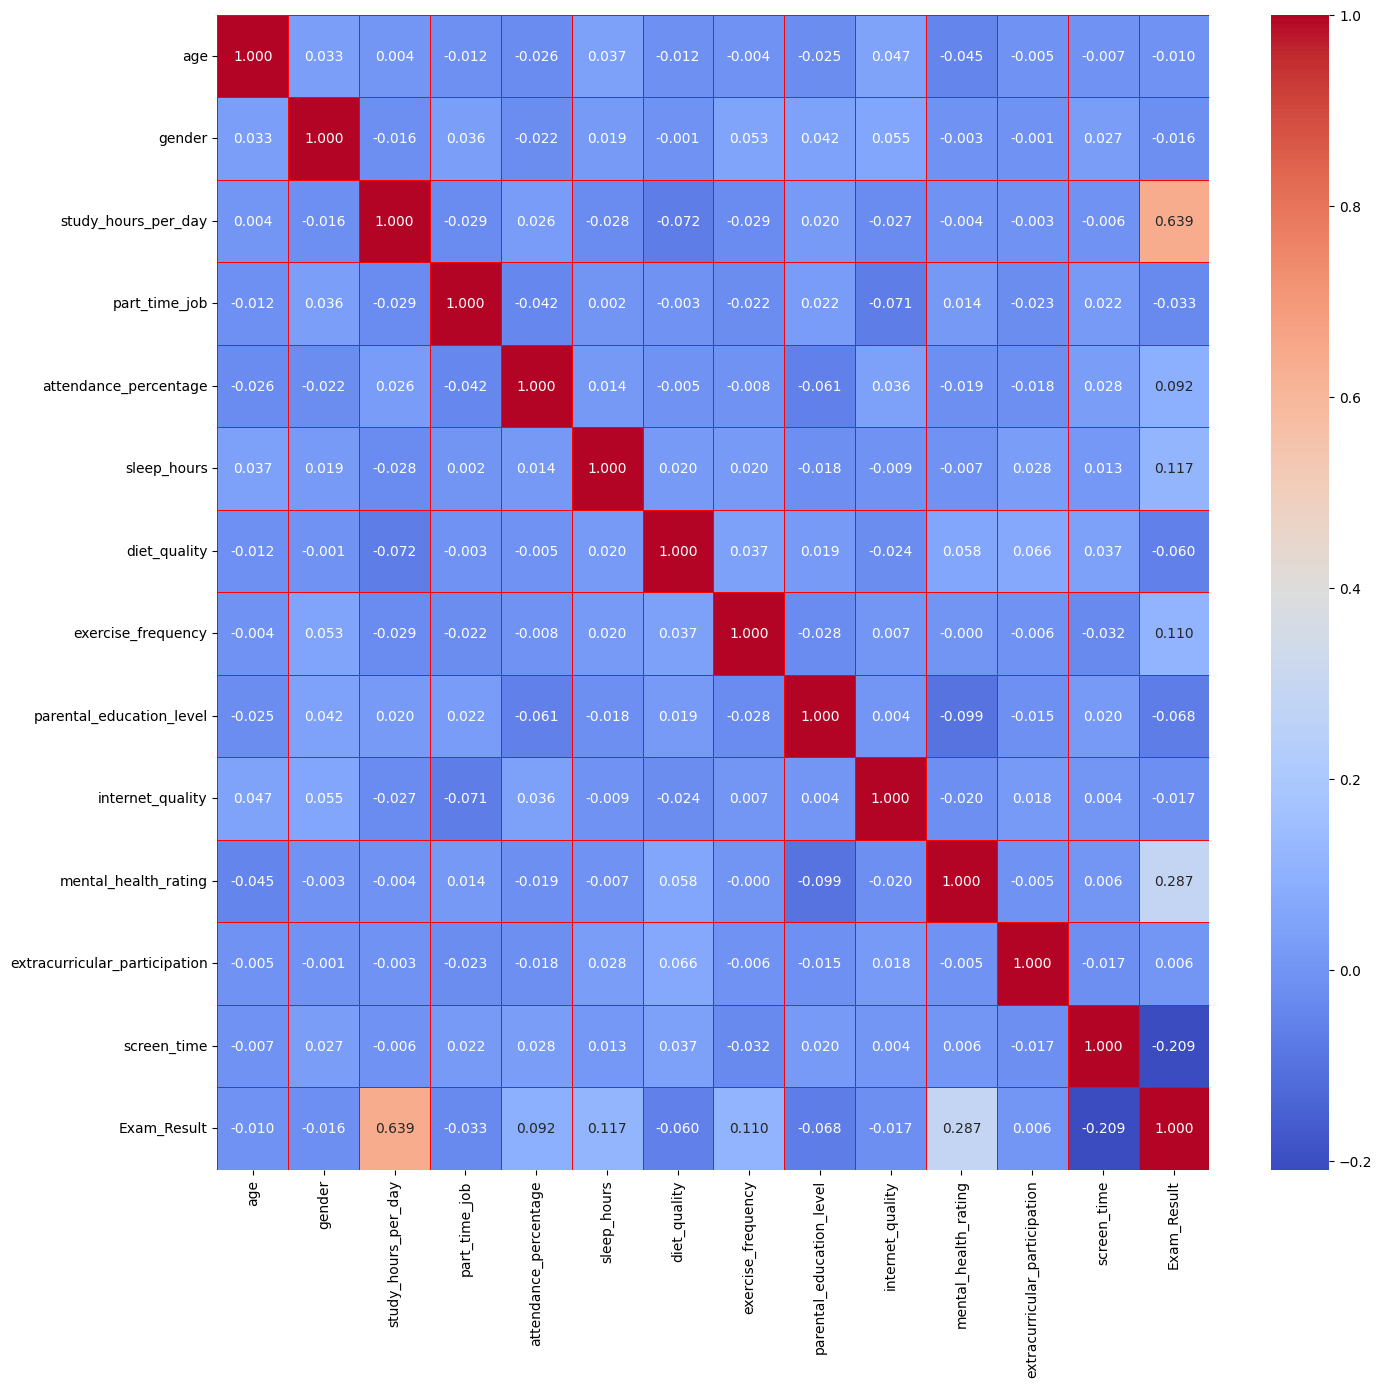

In [29]:
f,ax = plt.subplots(figsize=(16, 15))

sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.3f',cmap='coolwarm',ax=ax)
plt.show()

## Feature Selection

In [30]:
df_select = df[["study_hours_per_day","mental_health_rating","screen_time"]]

## Split Dataset

In [31]:
#X = df.drop('Exam_Result', axis=1)
X = df_select
y = df['Exam_Result']

In [32]:


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Standarisasi

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modelling

In [34]:

# 1. Logistic Regression
Logres = LogisticRegression(
    penalty='l2',
    C=0.5,
    solver='liblinear',
    max_iter=2000,
    random_state=42
).fit(X_train, y_train)

# 2. Decision Tree
dt = DecisionTreeClassifier(
    max_depth=7,
    min_samples_split=15,
    random_state=42
).fit(X_train, y_train)

# 3. Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    min_samples_leaf=5,
    random_state=42
).fit(X_train, y_train)

# 4. XGBoost
xgb = XGBClassifier(
    learning_rate=0.05,
    max_depth=4,
    n_estimators=300,
    random_state=42
).fit(X_train, y_train)


# Evaluation

In [37]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro'),
        "Cross Validation": cross_val_score(model, X_test, y_test, cv=5).mean()

    }
    return results

result = {
    'Logistic Regression': evaluate_model(Logres, X_test, y_test),
    'Decision Tree': evaluate_model(dt, X_test, y_test),
    'Random Forest': evaluate_model(rf, X_test, y_test),
    'XGBoost': evaluate_model(xgb, X_test, y_test)
}

summary = pd.DataFrame(columns=[ 'Accuracy', 'Precision', 'Recall', 'F1-Score', "Cross Validation"])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in result.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score'],
        "Cross Validation": metrics["Cross Validation"]

    })

# Konversi daftar kamus ke DataFrame
summary = pd.DataFrame(rows)

# Tampilkan DataFrame
summary.head()

,Model,Accuracy,Precision,Recall,F1-Score,Cross Validation
0,Logistic Regression,0.835,0.835859,0.833333,0.834067,0.830
1,Decision Tree,0.820,0.819782,0.820551,0.819838,0.710
2,Random Forest,0.835,0.834705,0.834336,0.834499,0.785
3,XGBoost,0.805,0.806490,0.806767,0.804995,0.785


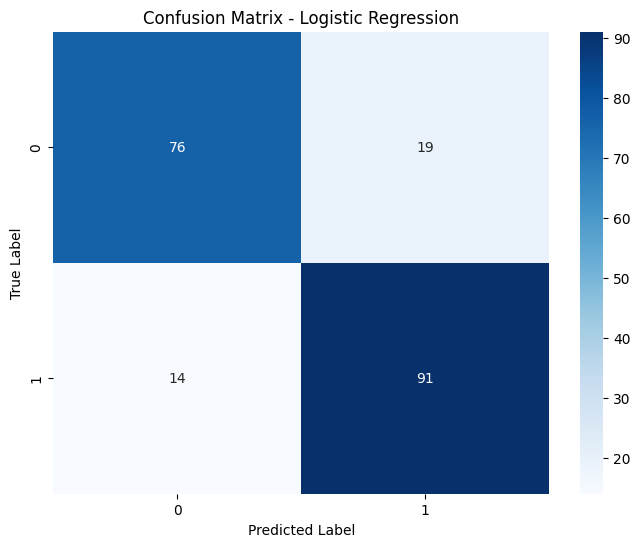

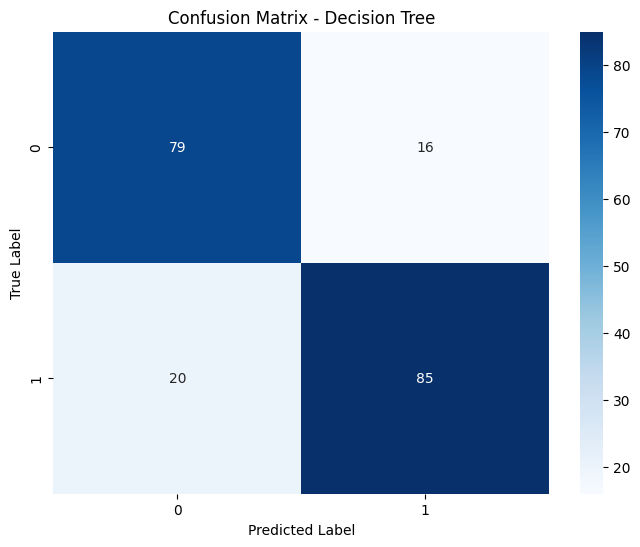

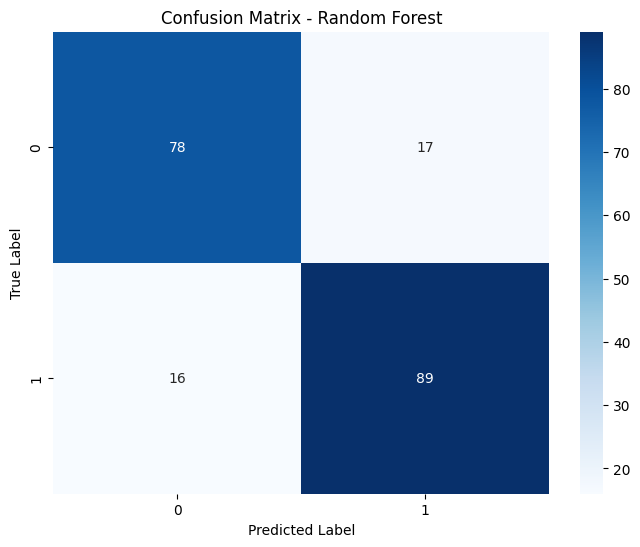

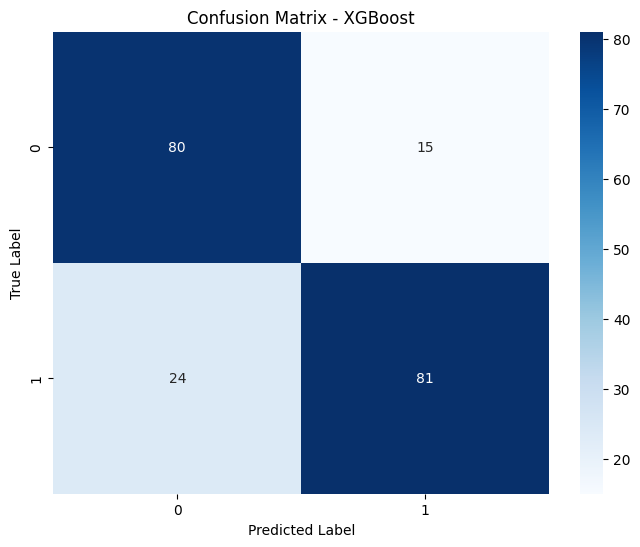

In [38]:
#confusion Matrix
for model_name, metrics in result.items():
  cm = metrics['Confusion Matrix']
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=np.unique(y), yticklabels=np.unique(y))
  plt.title(f"Confusion Matrix - {model_name}")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()


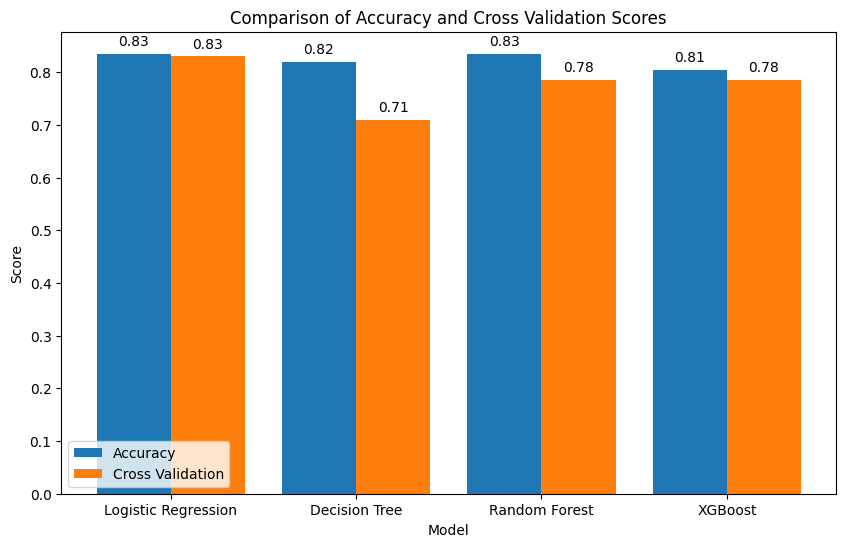

In [41]:

plt.figure(figsize=(10, 6))
models = summary['Model']
accuracy = summary['Accuracy']
cross_val = summary['Cross Validation']

X_axis = np.arange(len(models))

bars1= plt.bar(X_axis - 0.2, accuracy, 0.4, label='Accuracy')
bars2 =plt.bar(X_axis + 0.2, cross_val, 0.4, label='Cross Validation')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.,
                 height + 0.01,
                 f'{height:.2f}',
                 ha='center',
                 va='bottom',
                 fontsize=10)
plt.xticks(X_axis, models)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparison of Accuracy and Cross Validation Scores")
plt.legend()
plt.show()
